In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("dataset/Country-data.csv")

In [3]:
X = dataset.drop(columns = ['country'])
X.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
160,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900
67,6.0,81.8,7.33,76.5,22300,2.33,74.5,1.25,13100
136,28.1,49.3,8.55,81.2,1780,6.81,61.7,4.24,1290
98,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100
71,19.3,24.4,5.60,19.4,17400,15.90,74.5,1.76,6530
18,42.7,42.5,5.20,70.7,6420,5.99,72.1,2.38,2180
38,63.9,85.1,2.46,54.7,5190,20.70,60.4,4.95,2740
111,6.2,30.3,10.10,28.0,32300,3.73,80.9,2.17,33700
140,11.2,19.6,2.94,26.8,8560,22.80,74.4,2.20,2810
130,7.6,32.9,10.40,47.9,12700,5.88,74.7,1.40,5410


## EDA

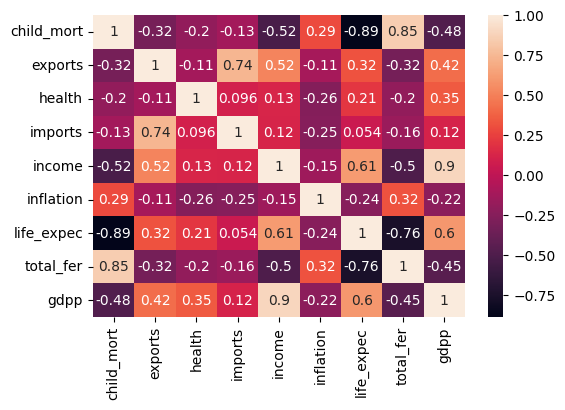

In [4]:
import seaborn as sns
plt.figure(dpi=100)
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

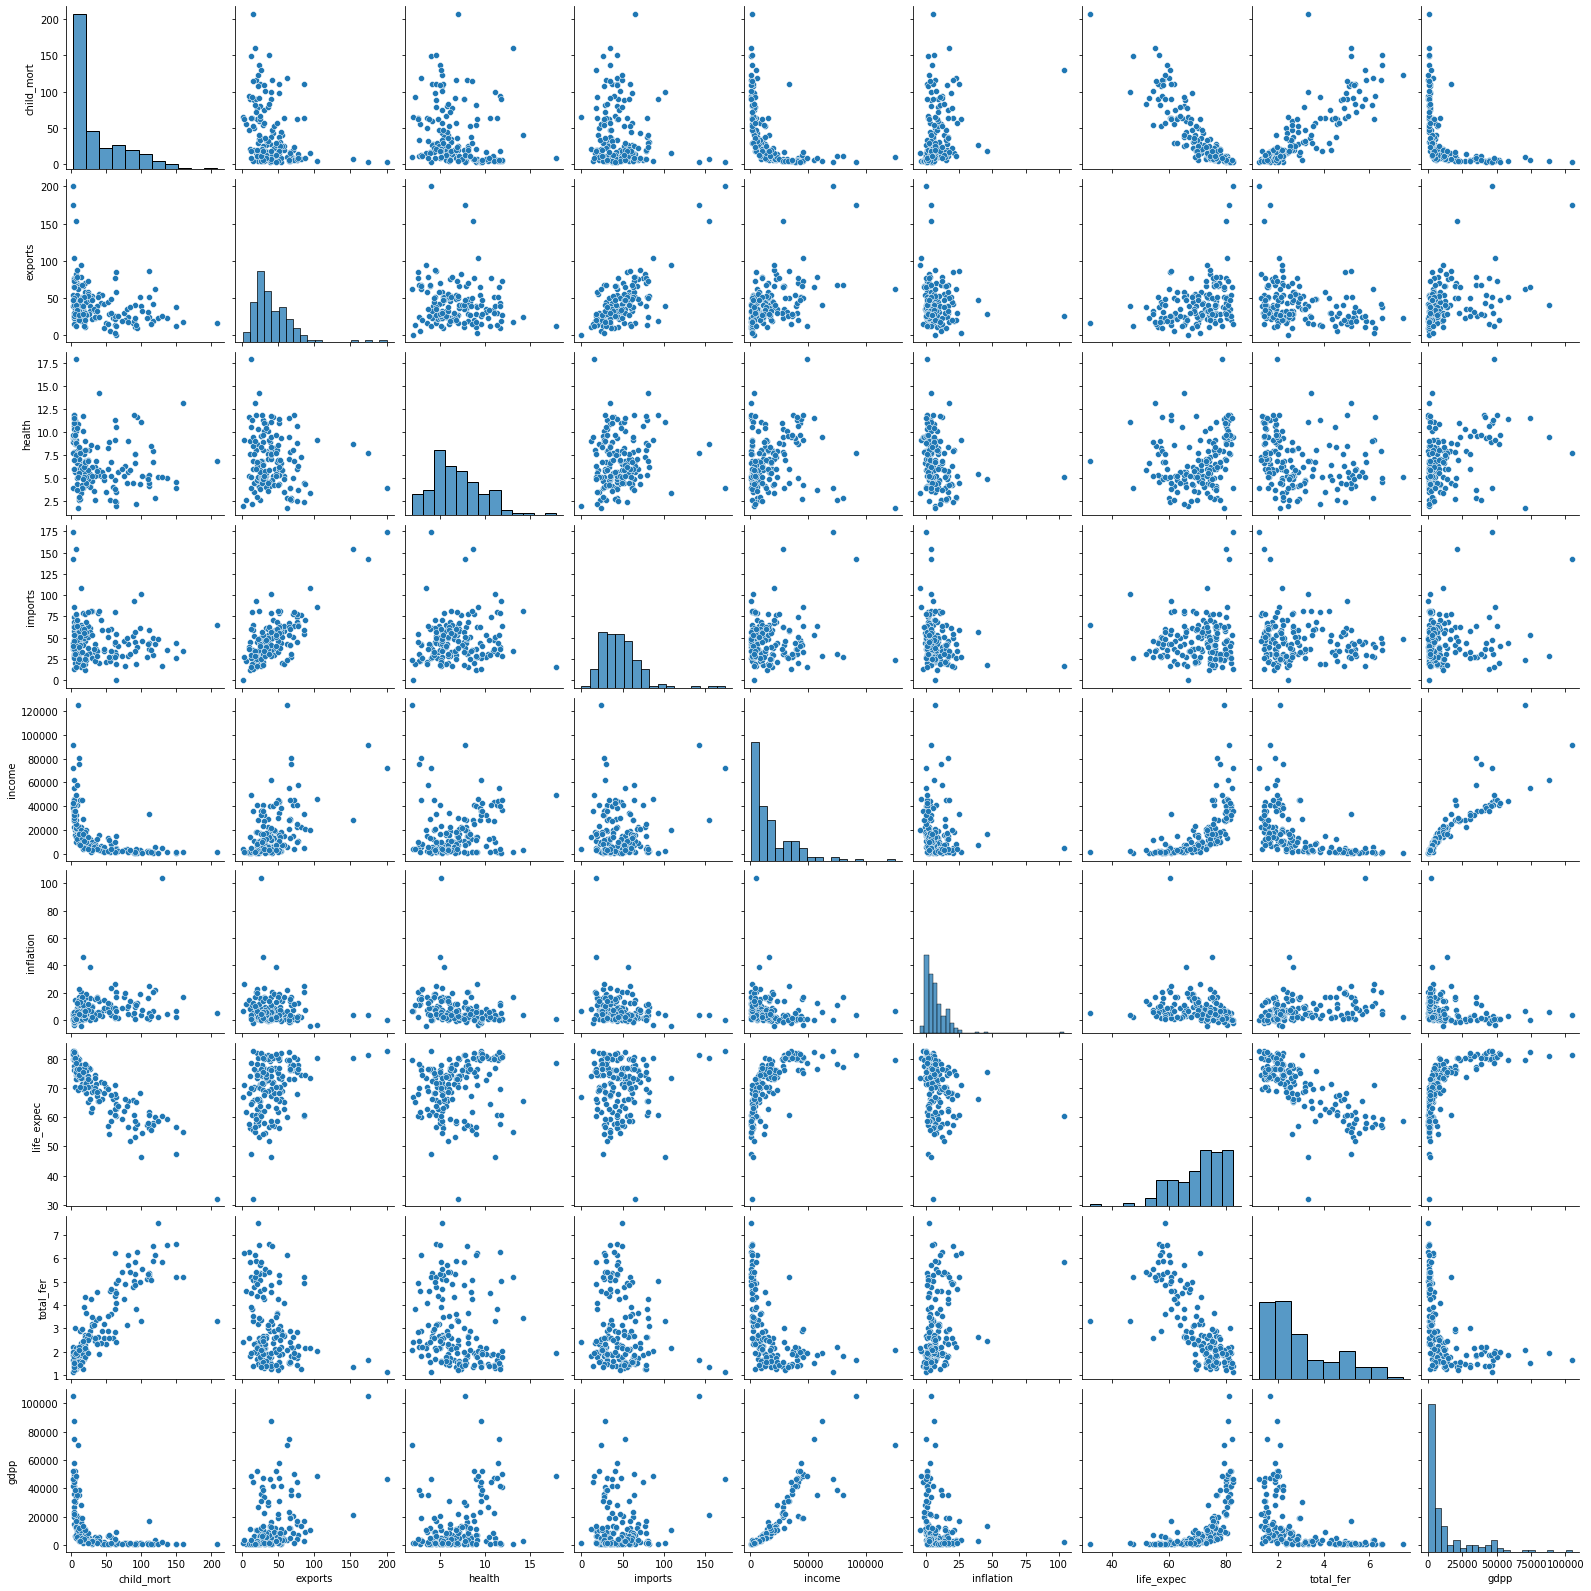

In [6]:
sns.pairplot(data=dataset)

## Datapreprocessing

In [5]:
# removing 'imports' feature
X = X.drop(columns = ['imports'])

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X

,child_mort,exports,health,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## DBSCAN

In [29]:
from sklearn.cluster import DBSCAN
# eps=, min_samples=5
dbscan = DBSCAN(eps=2, min_samples=10)
clusters = dbscan.fit_predict(X)
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0],
      dtype=int64)

In [30]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, clusters)
print(sil_score)

0.41826533065332716


In [23]:
set(dbscan.labels_)

{-1, 0}

### Visualization
I used 'life_expec', 'health', 'child_mort' features to visualize the dataset together with their related clusters.

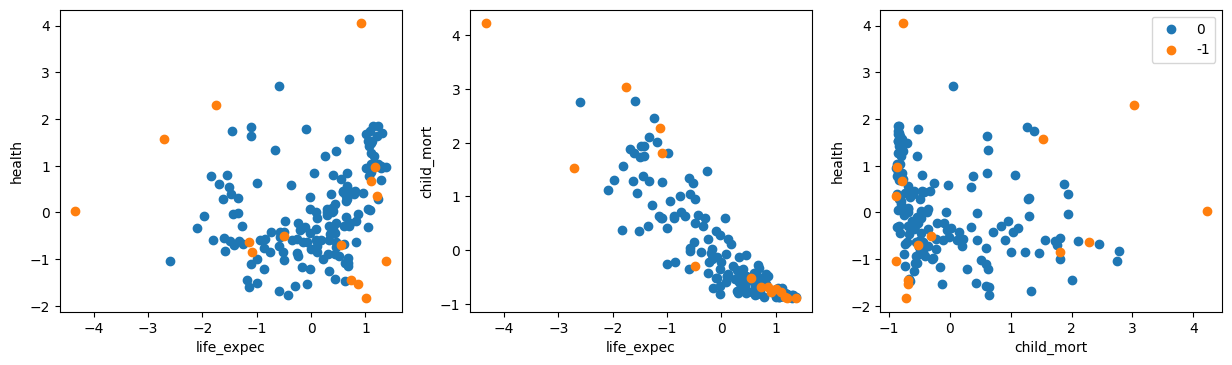

In [31]:
# life_expec, health, child_mort
axs = plt.figure(figsize=(15,4), dpi=100).subplots(1,3)
for c in set(dbscan.labels_):
    axs[0].scatter(X['life_expec'].loc[clusters == c], X['health'].loc[clusters == c], label="{0}".format(c))
    axs[1].scatter(X['life_expec'].loc[clusters == c], X['child_mort'].loc[clusters == c], label="{0}".format(c))
    axs[2].scatter(X['child_mort'].loc[clusters == c], X['health'].loc[clusters == c], label="{0}".format(c))

axs[0].set(xlabel="life_expec", ylabel="health")
axs[1].set(xlabel="life_expec", ylabel="child_mort")
axs[2].set(xlabel="child_mort", ylabel="health")    
plt.legend()
plt.show()    

## MeanShift

In [35]:
from sklearn.cluster import MeanShift
meanshift = MeanShift(bandwidth=2)
meanshift.fit_predict(X)

array([ 1,  0,  0,  6,  0,  0,  0,  2,  8,  0,  0,  2,  0,  0,  0,  2,  0,
        1,  0,  0,  0,  0,  0,  2,  0,  1,  1,  0,  1,  8,  0,  1,  1,  0,
        0,  0,  1,  1,  6,  0,  1,  0,  2,  0,  8,  0,  0,  0,  0,  6,  1,
        0,  0,  2,  8,  1,  1,  0,  8,  1,  0,  0,  0,  1,  1,  0,  4,  0,
        2,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  1,  1,  2,  0,  1,
        0,  0,  1,  1,  2,  0, 11,  0,  1,  1,  0,  0,  1,  9,  1,  0,  0,
        0,  3,  0,  0,  1,  0,  1,  0,  8,  0,  1,  5,  8,  2,  1,  0,  0,
        0,  0,  0,  0,  7,  0,  0,  1,  0,  2,  1,  0,  0,  1, 10,  0,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  2,  8,  0,  1,  0,  1,  1,  0,  0,
        0,  0,  1,  0,  2,  0,  8,  0,  0,  0,  3,  0,  1,  1],
      dtype=int64)

### Visulization

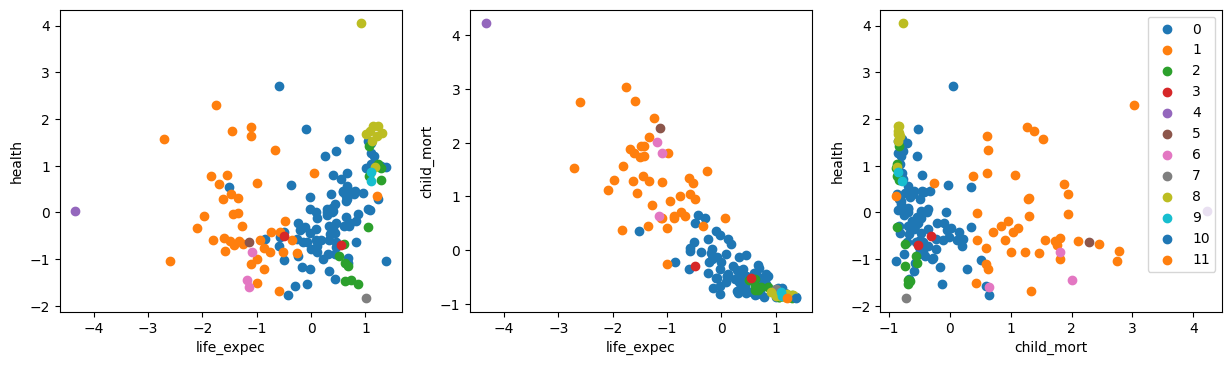

In [37]:
axs = plt.figure(figsize=(15,4), dpi=100).subplots(1,3)
for c in set(meanshift.labels_):
    axs[0].scatter(X['life_expec'].loc[clusters == c], X['health'].loc[clusters == c], label="{0}".format(c))
    axs[1].scatter(X['life_expec'].loc[clusters == c], X['child_mort'].loc[clusters == c], label="{0}".format(c))
    axs[2].scatter(X['child_mort'].loc[clusters == c], X['health'].loc[clusters == c], label="{0}".format(c))

axs[0].set(xlabel="life_expec", ylabel="health")
axs[1].set(xlabel="life_expec", ylabel="child_mort")
axs[2].set(xlabel="child_mort", ylabel="health")    
plt.legend()
plt.show()    

In [38]:
sil_score = silhouette_score(X, clusters)
print(sil_score)

0.23352951714091663
